In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # El nuevo protagonista
from sklearn.metrics import r2_score

# 1. Cargar y preparar (lo mismo que el anterior)
df = pd.read_csv('../data/viviendas.csv')
df['area_m2'] = df['area'] * 0.092903

# Transformaciones
df['airconditioning_num'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['mainroad_num'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom_num'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement_num'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating_num'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})

# Selección de variables
X = df[['area_m2', 'bedrooms', 'bathrooms', 'airconditioning_num', 
        'mainroad_num', 'guestroom_num', 'basement_num', 'hotwaterheating_num', 'parking']]
y = df['price']

# División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos listos para el duelo de modelos")

Datos listos para el duelo de modelos


In [8]:
# Re-entrenando con un pequeño ajuste para mejorar la generalización
rf_model_v2 = RandomForestRegressor(n_estimators=200, 
                                    min_samples_leaf=5, 
                                    random_state=42)
rf_model_v2.fit(X_train, y_train)

# Nueva puntuación
nuevo_score = rf_model_v2.score(X_test, y_test)
print(f"Precisión RF Ajustado: {nuevo_score:.2%}")

Precisión RF Ajustado: 56.37%


In [9]:
# Calculamos la precisión del nuevo modelo
rf_score = rf_model.score(X_test, y_test)

print(f"Precisión anterior (Lineal): 58.67%")
print(f"Nueva precisión (Random Forest): {nuevo_score:.2%}")

Precisión anterior (Lineal): 58.67%
Nueva precisión (Random Forest): 56.37%


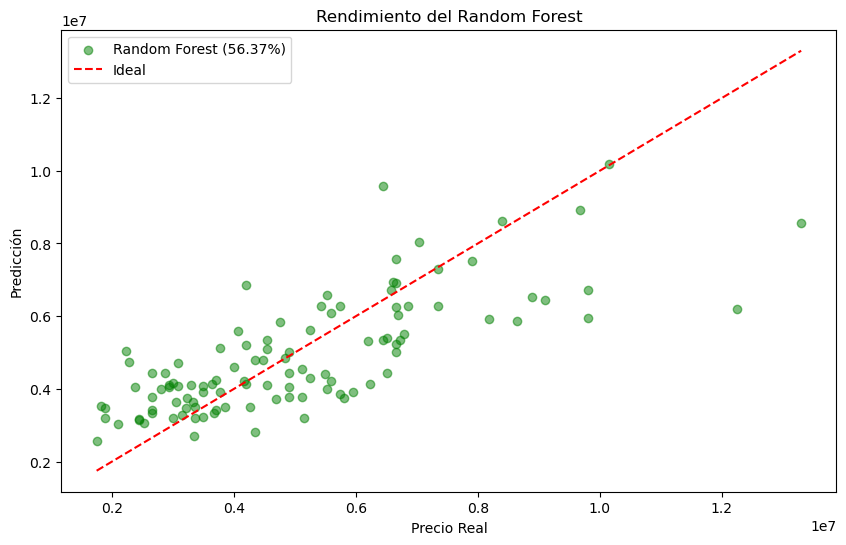

In [11]:
import matplotlib.pyplot as plt

y_pred_linear = 0.5867 # Valor de referencia
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5, label=f'Random Forest ({nuevo_score:.2%})')
# Dibujamos la línea de perfección
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal')

plt.title('Rendimiento del Random Forest')
plt.xlabel('Precio Real')
plt.ylabel('Predicción')
plt.legend()
plt.show()

 Modelo de Regresión Lineal cargado con éxito.


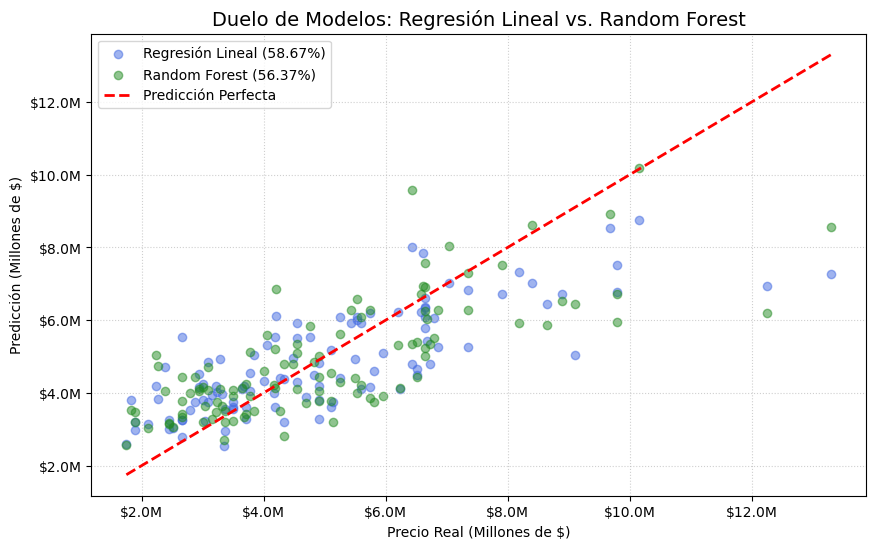

In [15]:
import joblib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# 1. Cargamos el modelo que guardamos anteriormente
# Nota: Asegúrate de que la ruta '../models/house_price_model.pkl' sea correcta
try:
    model = joblib.load('../models/house_price_model.pkl')
    print(" Modelo de Regresión Lineal cargado con éxito.")
except:
    print(" No se encontró el archivo .pkl. Asegúrate de haberlo guardado en el Notebook 02.")

# 2. Generamos las predicciones de ambos modelos
# 'model' es la Regresión Lineal cargada y 'rf_model' es el Random Forest que creaste aquí
y_pred_linear = model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# 3. Creamos la visualización comparativa
plt.figure(figsize=(10, 6))

# Dibujamos ambos resultados para comparar
plt.scatter(y_test, y_pred_linear, color='royalblue', alpha=0.5, label='Regresión Lineal (58.67%)')
plt.scatter(y_test, y_pred_rf, color='forestgreen', alpha=0.5, label='Random Forest (56.37%)')

# Línea de Predicción Perfecta (Ideal)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Predicción Perfecta')

# Formatear ejes a Millones de Dólares ($M)
formatter = ticker.FuncFormatter(lambda x, pos: f'${x/1e6:.1f}M')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Detalles finales del gráfico
plt.title('Duelo de Modelos: Regresión Lineal vs. Random Forest', fontsize=14)
plt.xlabel('Precio Real (Millones de $)')
plt.ylabel('Predicción (Millones de $)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

# Guardamos la comparativa para el portafolio
plt.savefig('comparativa_modelos.png', bbox_inches='tight')
plt.show()

In [17]:
# --- PREDICCIÓN CON DATOS NUEVOS ---

# Edita estos valores para probar tu casa ideal:
mi_casa = {
    'area_m2': 150,           # Tamaño en metros cuadrados
    'bedrooms': 3,            # Habitaciones
    'bathrooms': 2,           # Baños
    'airconditioning_num': 1, # 1 para sí, 0 para no
    'mainroad_num': 1,        # 1 para sí, 0 para no
    'guestroom_num': 0,       # 1 para sí, 0 para no
    'basement_num': 1,        # 1 para sí, 0 para no
    'hotwaterheating_num': 0, # 1 para sí, 0 para no
    'parking': 2              # Plazas de garaje
}

# Convertimos a DataFrame para que la IA lo entienda
casa_df = pd.DataFrame([mi_casa])

# Realizamos las predicciones
pred_lineal = model.predict(casa_df)[0]
pred_rf = rf_model.predict(casa_df)[0]

print(f" DATOS DE LA CASA: {mi_casa['area_m2']}m², {mi_casa['bedrooms']} hab, {mi_casa['bathrooms']} baños")
print("-" * 50)
print(f" Precio estimado (Regresión Lineal): ${pred_lineal/1e6:.2f} Millones")
print(f" Precio estimado (Random Forest):    ${pred_rf/1e6:.2f} Millones")
print("-" * 50)
print(f"Diferencia: ${abs(pred_lineal - pred_rf)/1e3:.1f} mil dólares")

 DATOS DE LA CASA: 150m², 3 hab, 2 baños
--------------------------------------------------
 Precio estimado (Regresión Lineal): $5.94 Millones
 Precio estimado (Random Forest):    $4.64 Millones
--------------------------------------------------
Diferencia: $1295.8 mil dólares


In [18]:
import joblib
import os

# Crear la carpeta models si por alguna razón no existe
if not os.path.exists('../models'):
    os.makedirs('../models')

# Guardar el modelo de Random Forest
joblib.dump(rf_model, '../models/random_forest_model.pkl')

print(" Modelo Random Forest guardado exitosamente en '../models/random_forest_model.pkl'")

 Modelo Random Forest guardado exitosamente en '../models/random_forest_model.pkl'
